In [1]:
#Loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression

# Problem Statement

#### Dependent And Independent Column

# Collect and Understand the Dataset

In [25]:
df = pd.read_csv(r"C:\Users\Abhinav Khandelwal\Desktop\MS DS\Trimester 3\Regression Modelling\Project Life Expectancy\Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Dataset Description and Source:

#### Dataset Metadeta

In [26]:
#Number of Records in the datase
print("Total number of records in the dataset are: ", df.shape[0])

Total number of records in the dataset are:  2938


In [27]:
#Number of Variables in the dataset
print("Total number of variable in the dataset are: ", df.shape[1])

Total number of variable in the dataset are:  22


In [28]:
#Nature of the variables
print("Nature of the variables are: ")
print("    ")
df.info()

Nature of the variables are: 
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null 

# Exploratory Data Analysis and Data Preprocessing

In [29]:
pd.set_option('display.max_columns', None)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
#After reviewing the dataset we can remove the year and the country column and not contributing to the analysis.
#Instead of a country we will focus on Status of the country whether it is developed or developing
df.drop(columns={"Country","Year"}, inplace=True)
list(df.columns)

['Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [31]:
df["Status"]

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [32]:
#Performing One Hot Encoding on Status Column
df = pd.get_dummies(df,dtype= int)
df[["Status_Developed","Status_Developing"]]

,Status_Developed,Status_Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


<Axes: >

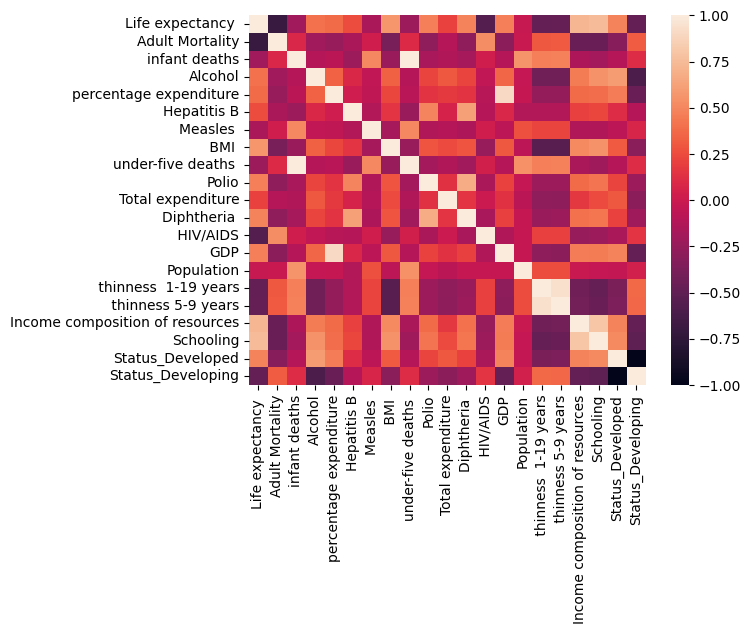

In [33]:
#Correlation matrix to check the relationship between the variables
sns.heatmap(df.corr())

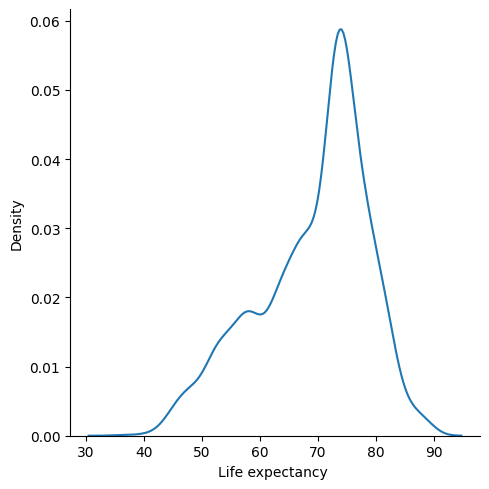

In [34]:
#Distribution of Life Expectancy (Dependent Column)
sns.displot(data = df, x = df.columns[0], kind = "kde")

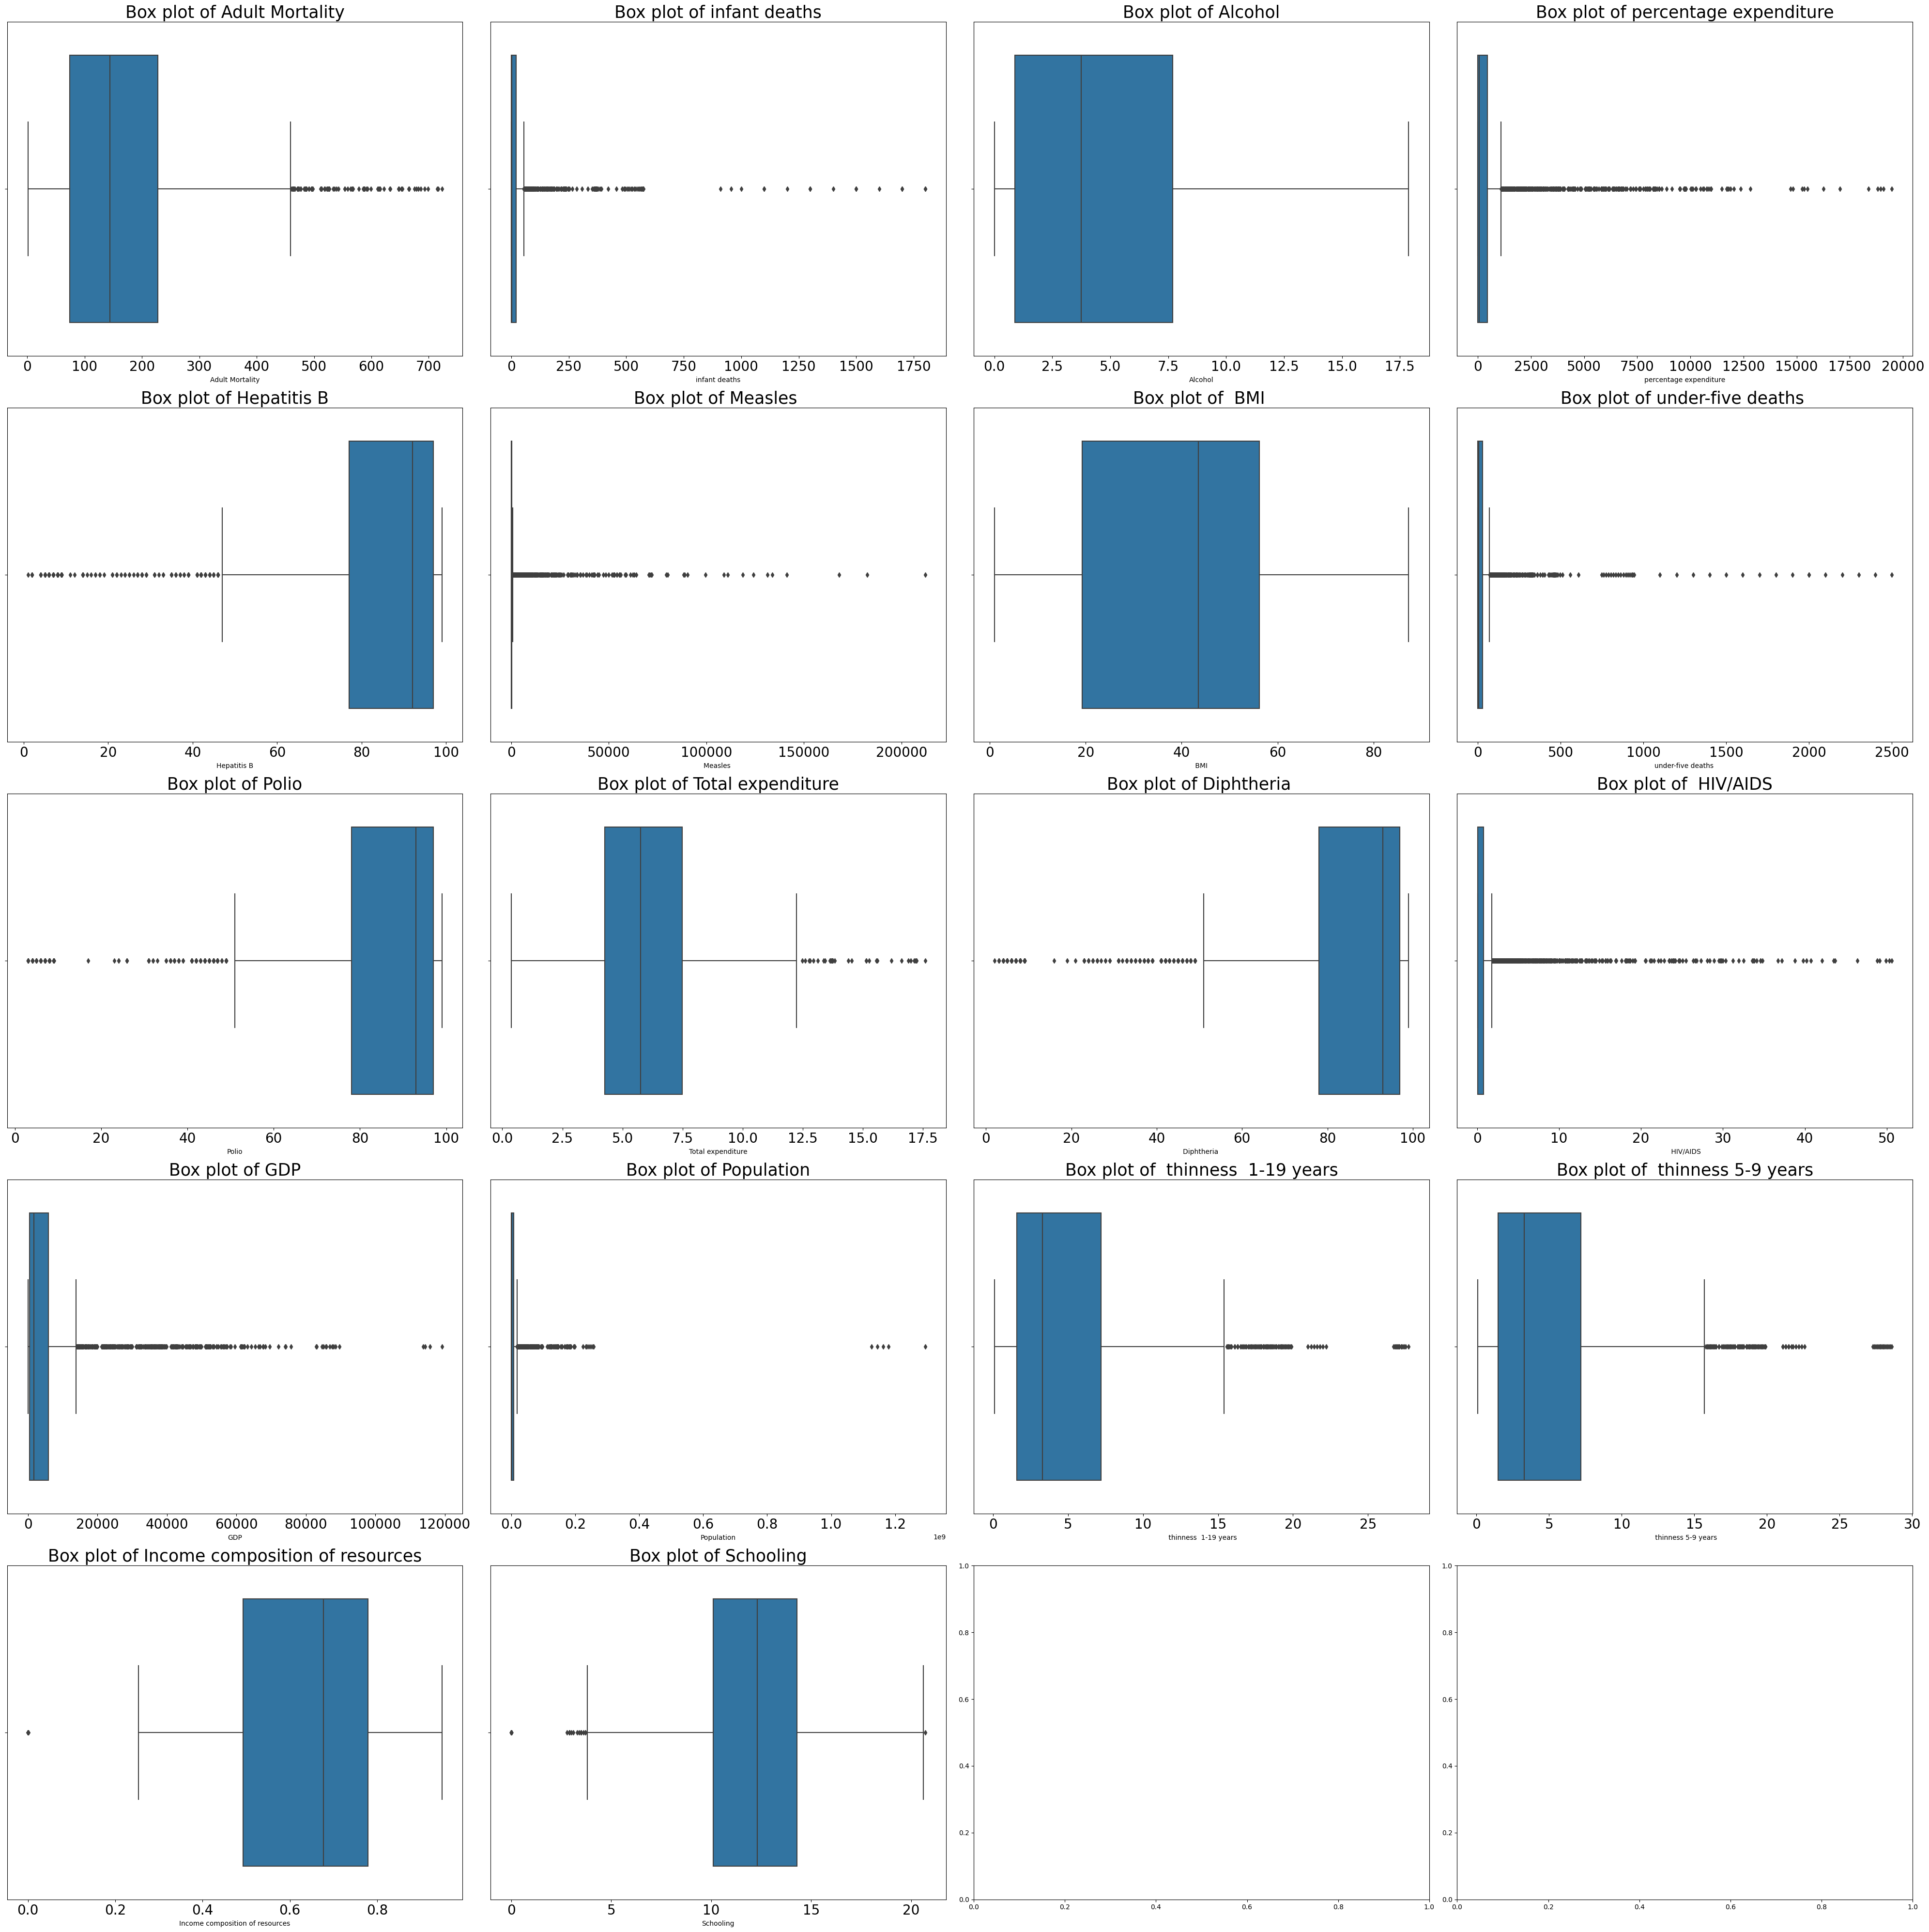

In [145]:
fig, ax = plt.subplots(nrows = 5, ncols=4, figsize = (40,40))
ax = ax.flatten()
plot_ax = 0
ignore_columns = ["Life expectancy ","Status_Developed","Status_Developing"]
for i in df.columns:
    if i in ignore_columns:
        continue
    else:
        sns.boxplot(data = df, x = i, ax = ax[plot_ax])
        ax[plot_ax].tick_params(axis='x', labelsize=20)
        ax[plot_ax].set_title(f'Box plot of {i}', fontsize = 25)
        plot_ax = plot_ax + 1

plt.tight_layout()
plt.savefig('C:\\Users\\Abhinav Khandelwal\\Desktop\\MS DS\\Trimester 3\\Regression Modelling\\Project Life Expectancy\\boxplot_output.png', dpi=300, bbox_inches='tight')

plt.show() 



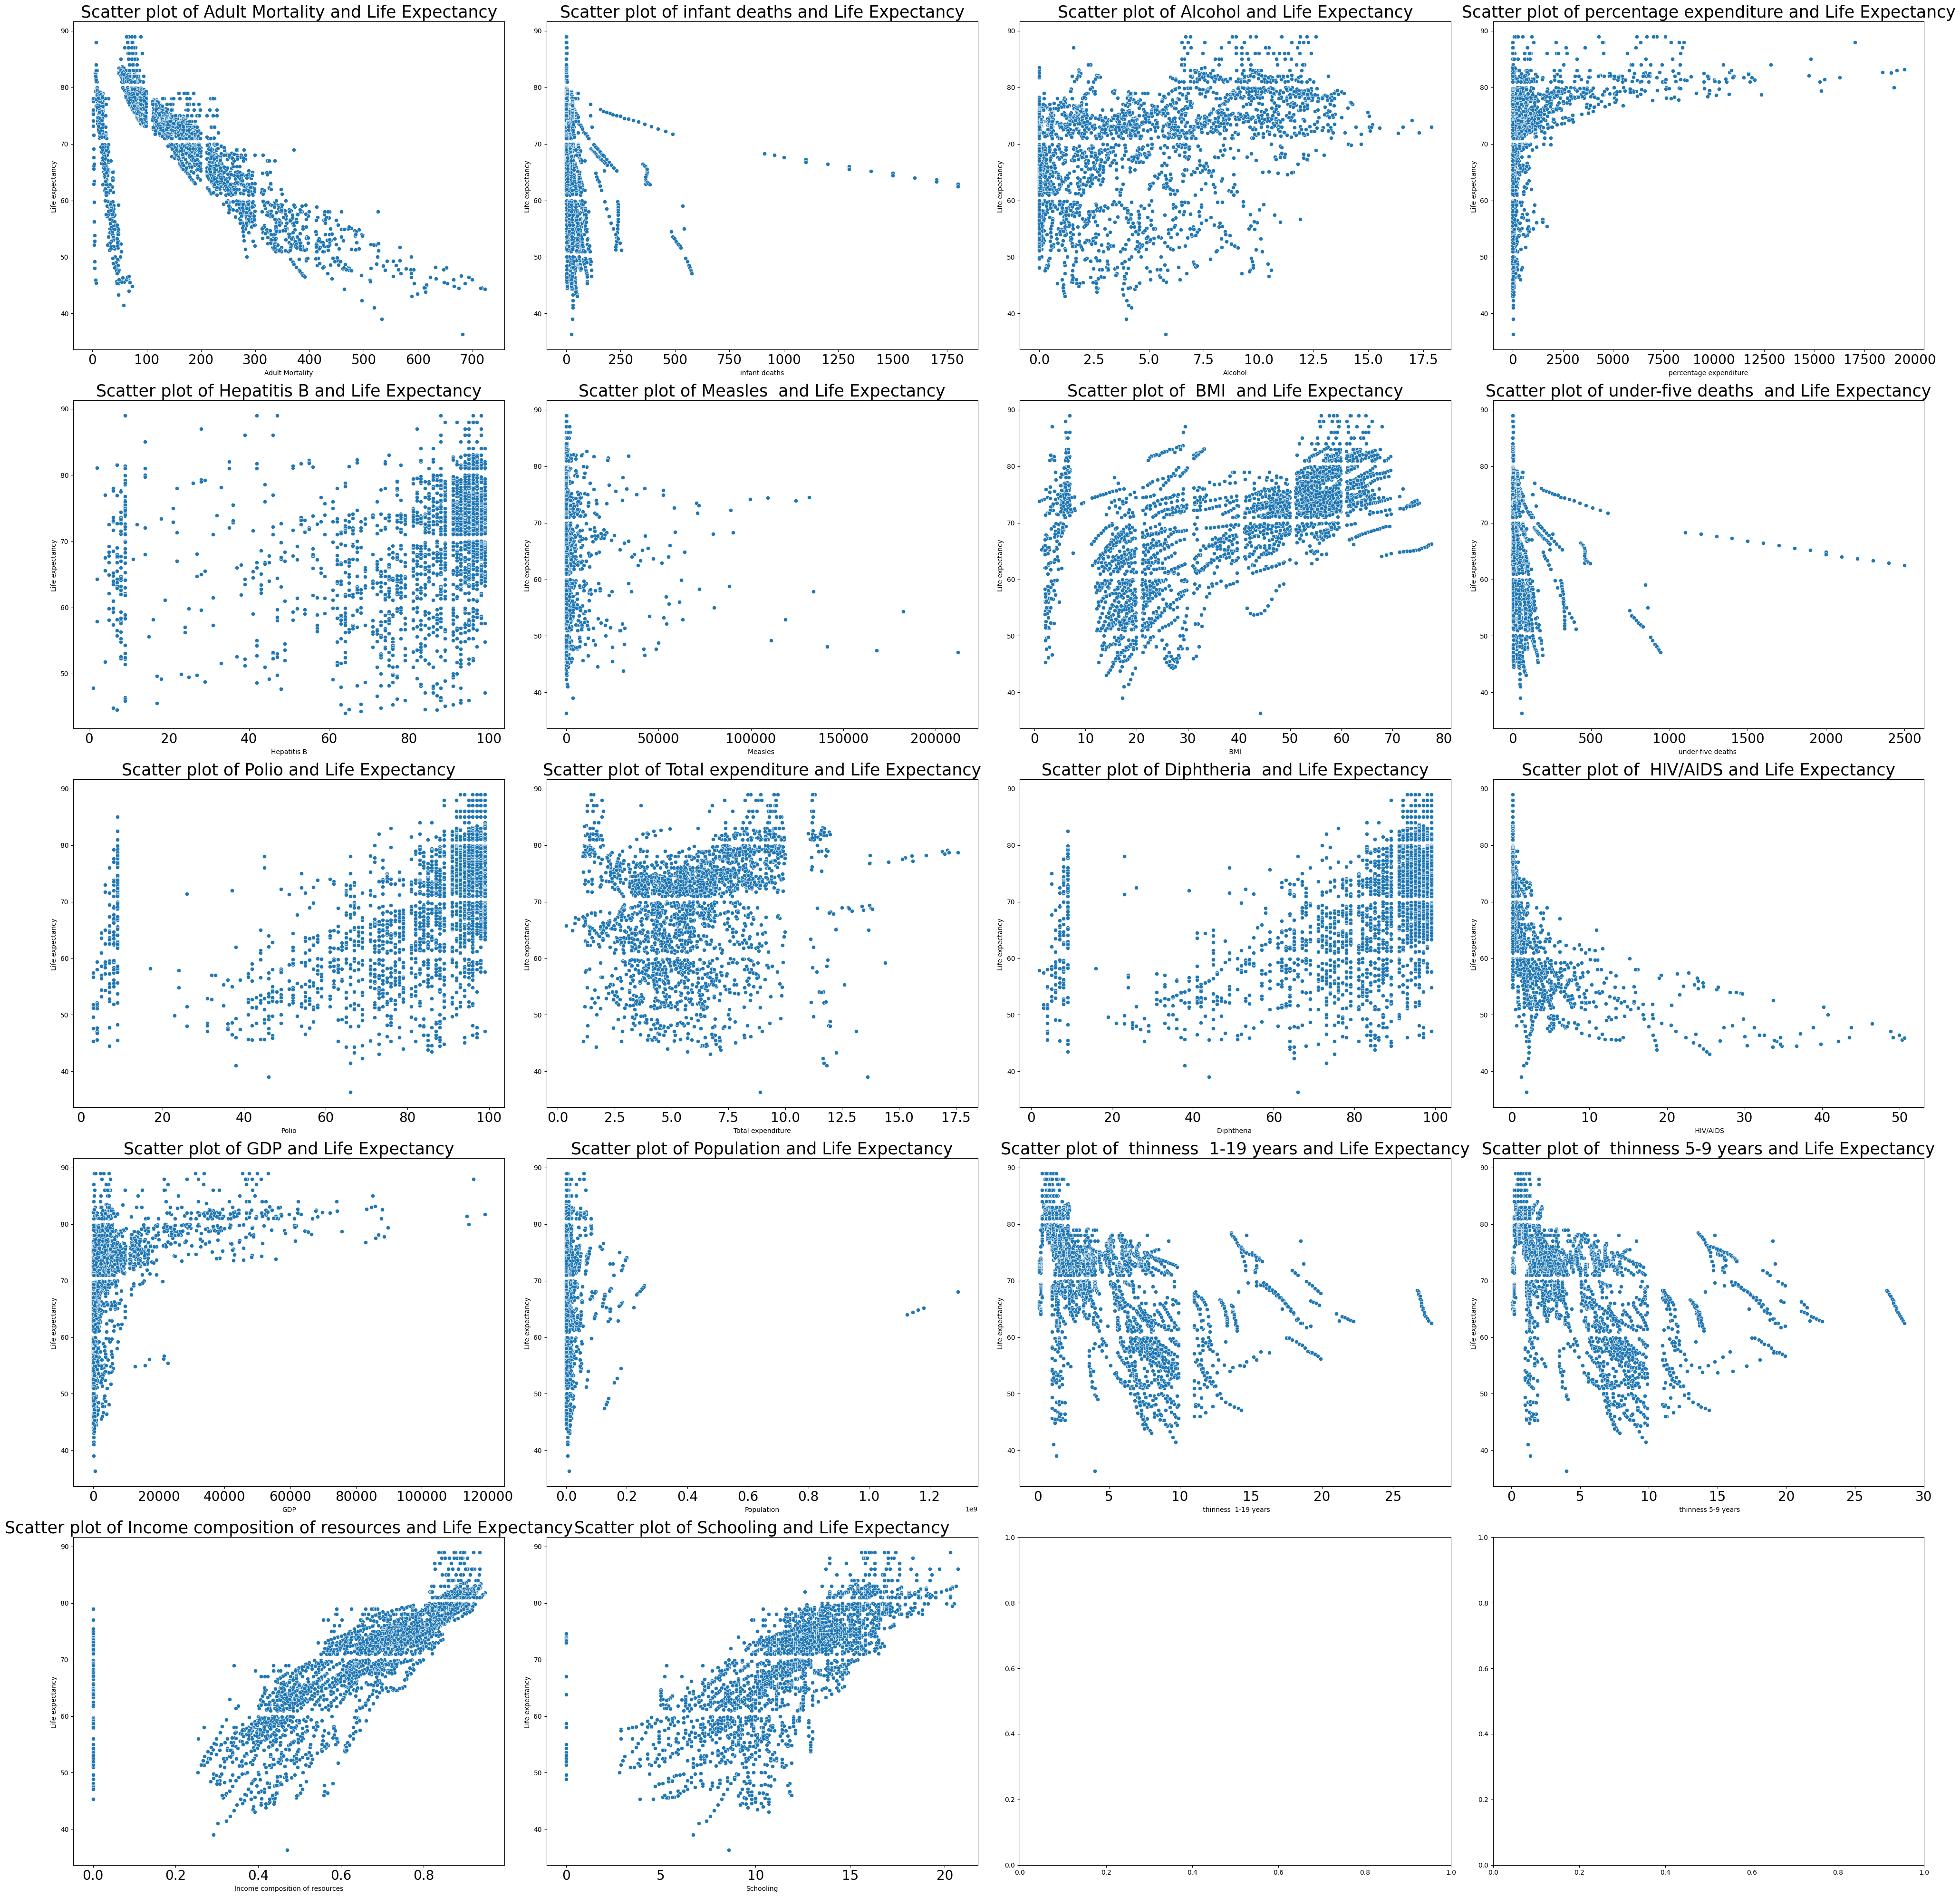

In [146]:
warnings.filterwarnings(action = "ignore")
fig, ax = plt.subplots(nrows = 5, ncols=4, figsize = (40,40))
ax = ax.flatten()
plot_ax = 0
ignore_columns = ["Life expectancy ","Status_Developed","Status_Developing"]
for i in df.columns:
    if i in ignore_columns:
        continue
    else:
        sns.scatterplot(data = df, x = i, y = "Life expectancy ", ax = ax[plot_ax])
        ax[plot_ax].tick_params(axis='x', labelsize=20)
        ax[plot_ax].set_title(f'Scatter plot of {i} and Life Expectancy', fontsize = 25)
        
        plot_ax = plot_ax + 1
plt.tight_layout()
plt.savefig('C:\\Users\\Abhinav Khandelwal\\Desktop\\MS DS\\Trimester 3\\Regression Modelling\\Project Life Expectancy\\scatter_output.png', dpi=300, bbox_inches='tight')

plt.show() 

In [35]:
#Check for null values
df.isnull().sum()/df.shape[0]*100

Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
Status_Developed                    0.000000
Status_Developing                   0.000000
dtype: float64

In [36]:
#Handling null values
drop_rows = df.columns[((df.isnull().sum()/df.shape[0] * 100 > 0) & (df.isnull().sum()/df.shape[0] * 100 <= 5)).values]
for i in drop_rows:
    df.dropna(subset = i,inplace = True)

In [37]:
impute_col = df.columns[(df.isnull().sum()/df.shape[0] * 100 > 5).values]

In [38]:
imputing = [
    ("imputer", SimpleImputer(), impute_col)
]
imputer_transf = ColumnTransformer(imputing, remainder="passthrough")
df2 = pd.DataFrame(imputer_transf.fit_transform(df), columns= imputer_transf.get_feature_names_out())

In [39]:
df2.isnull().sum()/df.shape[0] * 100

imputer__Alcohol                            0.0
imputer__Hepatitis B                        0.0
imputer__Total expenditure                  0.0
imputer__GDP                                0.0
imputer__Population                         0.0
imputer__Income composition of resources    0.0
imputer__Schooling                          0.0
remainder__Life expectancy                  0.0
remainder__Adult Mortality                  0.0
remainder__infant deaths                    0.0
remainder__percentage expenditure           0.0
remainder__Measles                          0.0
remainder__ BMI                             0.0
remainder__under-five deaths                0.0
remainder__Polio                            0.0
remainder__Diphtheria                       0.0
remainder__ HIV/AIDS                        0.0
remainder__ thinness  1-19 years            0.0
remainder__ thinness 5-9 years              0.0
remainder__Status_Developed                 0.0
remainder__Status_Developing            

In [40]:
#Applying Variable Transformation to handle the outliers
power_transform = PowerTransformer()
x = df2.drop(columns = "remainder__Life expectancy ")
y = df2["remainder__Life expectancy "]
x = pd.DataFrame(power_transform.fit_transform(x), columns= x.columns)

In [41]:
x

,imputer__Alcohol,imputer__Hepatitis B,imputer__Total expenditure,imputer__GDP,imputer__Population,imputer__Income composition of resources,imputer__Schooling,remainder__Adult Mortality,remainder__infant deaths,remainder__percentage expenditure,remainder__Measles,remainder__ BMI,remainder__under-five deaths,remainder__Polio,remainder__Diphtheria,remainder__ HIV/AIDS,remainder__ thinness 1-19 years,remainder__ thinness 5-9 years,remainder__Status_Developed,remainder__Status_Developing
0,-1.531456,-1.220119,0.946502,-0.788718,1.324666,-0.942799,-0.702476,0.896309,1.371123,0.076313,1.159182,-0.934885,1.349964,-2.300855,-1.287345,-0.697629,1.862863,1.862231,-0.464207,0.464207
1,-1.531456,-1.354326,0.953855,-0.765129,-0.830884,-0.955526,-0.733165,0.942342,1.382333,0.087575,0.969489,-0.961502,1.362078,-1.570333,-1.411438,-0.697629,1.882939,1.875783,-0.464207,0.464207
2,-1.531456,-1.266058,0.935459,-0.749875,1.286295,-0.980758,-0.763727,0.925175,1.393121,0.086067,0.937821,-0.988203,1.373694,-1.420624,-1.329892,-0.697629,1.896124,1.889178,-0.464207,0.464207
3,-1.531456,-1.124562,1.077800,-0.720485,0.125533,-1.009821,-0.794163,0.948040,1.408574,0.109937,1.337046,-1.014989,1.388467,-1.207346,-1.198624,-0.697629,1.909156,1.908984,-0.464207,0.464207
4,-1.531456,-1.074918,0.839079,-1.774756,0.026747,-1.046602,-0.884700,0.965060,1.418424,-0.714877,1.351934,-1.036482,1.402493,-1.161052,-1.152421,-0.697629,1.928421,1.922002,-0.464207,0.464207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,0.199559,-1.074918,0.557746,-0.911721,0.753027,-1.228259,-0.974069,2.810885,1.048102,-1.443585,0.218956,-0.518771,1.100067,-1.207346,-1.287345,1.920992,1.155708,1.141975,-0.464207,0.464207
2884,0.125378,-2.341060,0.317271,-0.912802,0.746811,-1.187281,-0.884700,2.785201,1.032057,-1.443585,1.128141,-0.539193,1.090602,-2.300056,-1.152421,1.921531,1.204643,1.203015,-0.464207,0.464207
2885,0.216435,-0.807498,0.321281,-1.815058,-1.129704,-1.153063,-0.733165,-0.622991,1.015254,-1.443585,0.854074,-0.559652,1.080859,-0.910556,-1.006254,1.921954,-1.025946,-0.940600,-0.464207,0.464207
2886,-0.602544,-0.631213,0.171324,-0.819820,0.735058,-1.153063,-0.794163,2.690646,1.015254,-1.443585,0.986340,-0.580147,1.070822,-0.744498,-0.793170,1.922213,-0.774865,-0.707736,-0.464207,0.464207


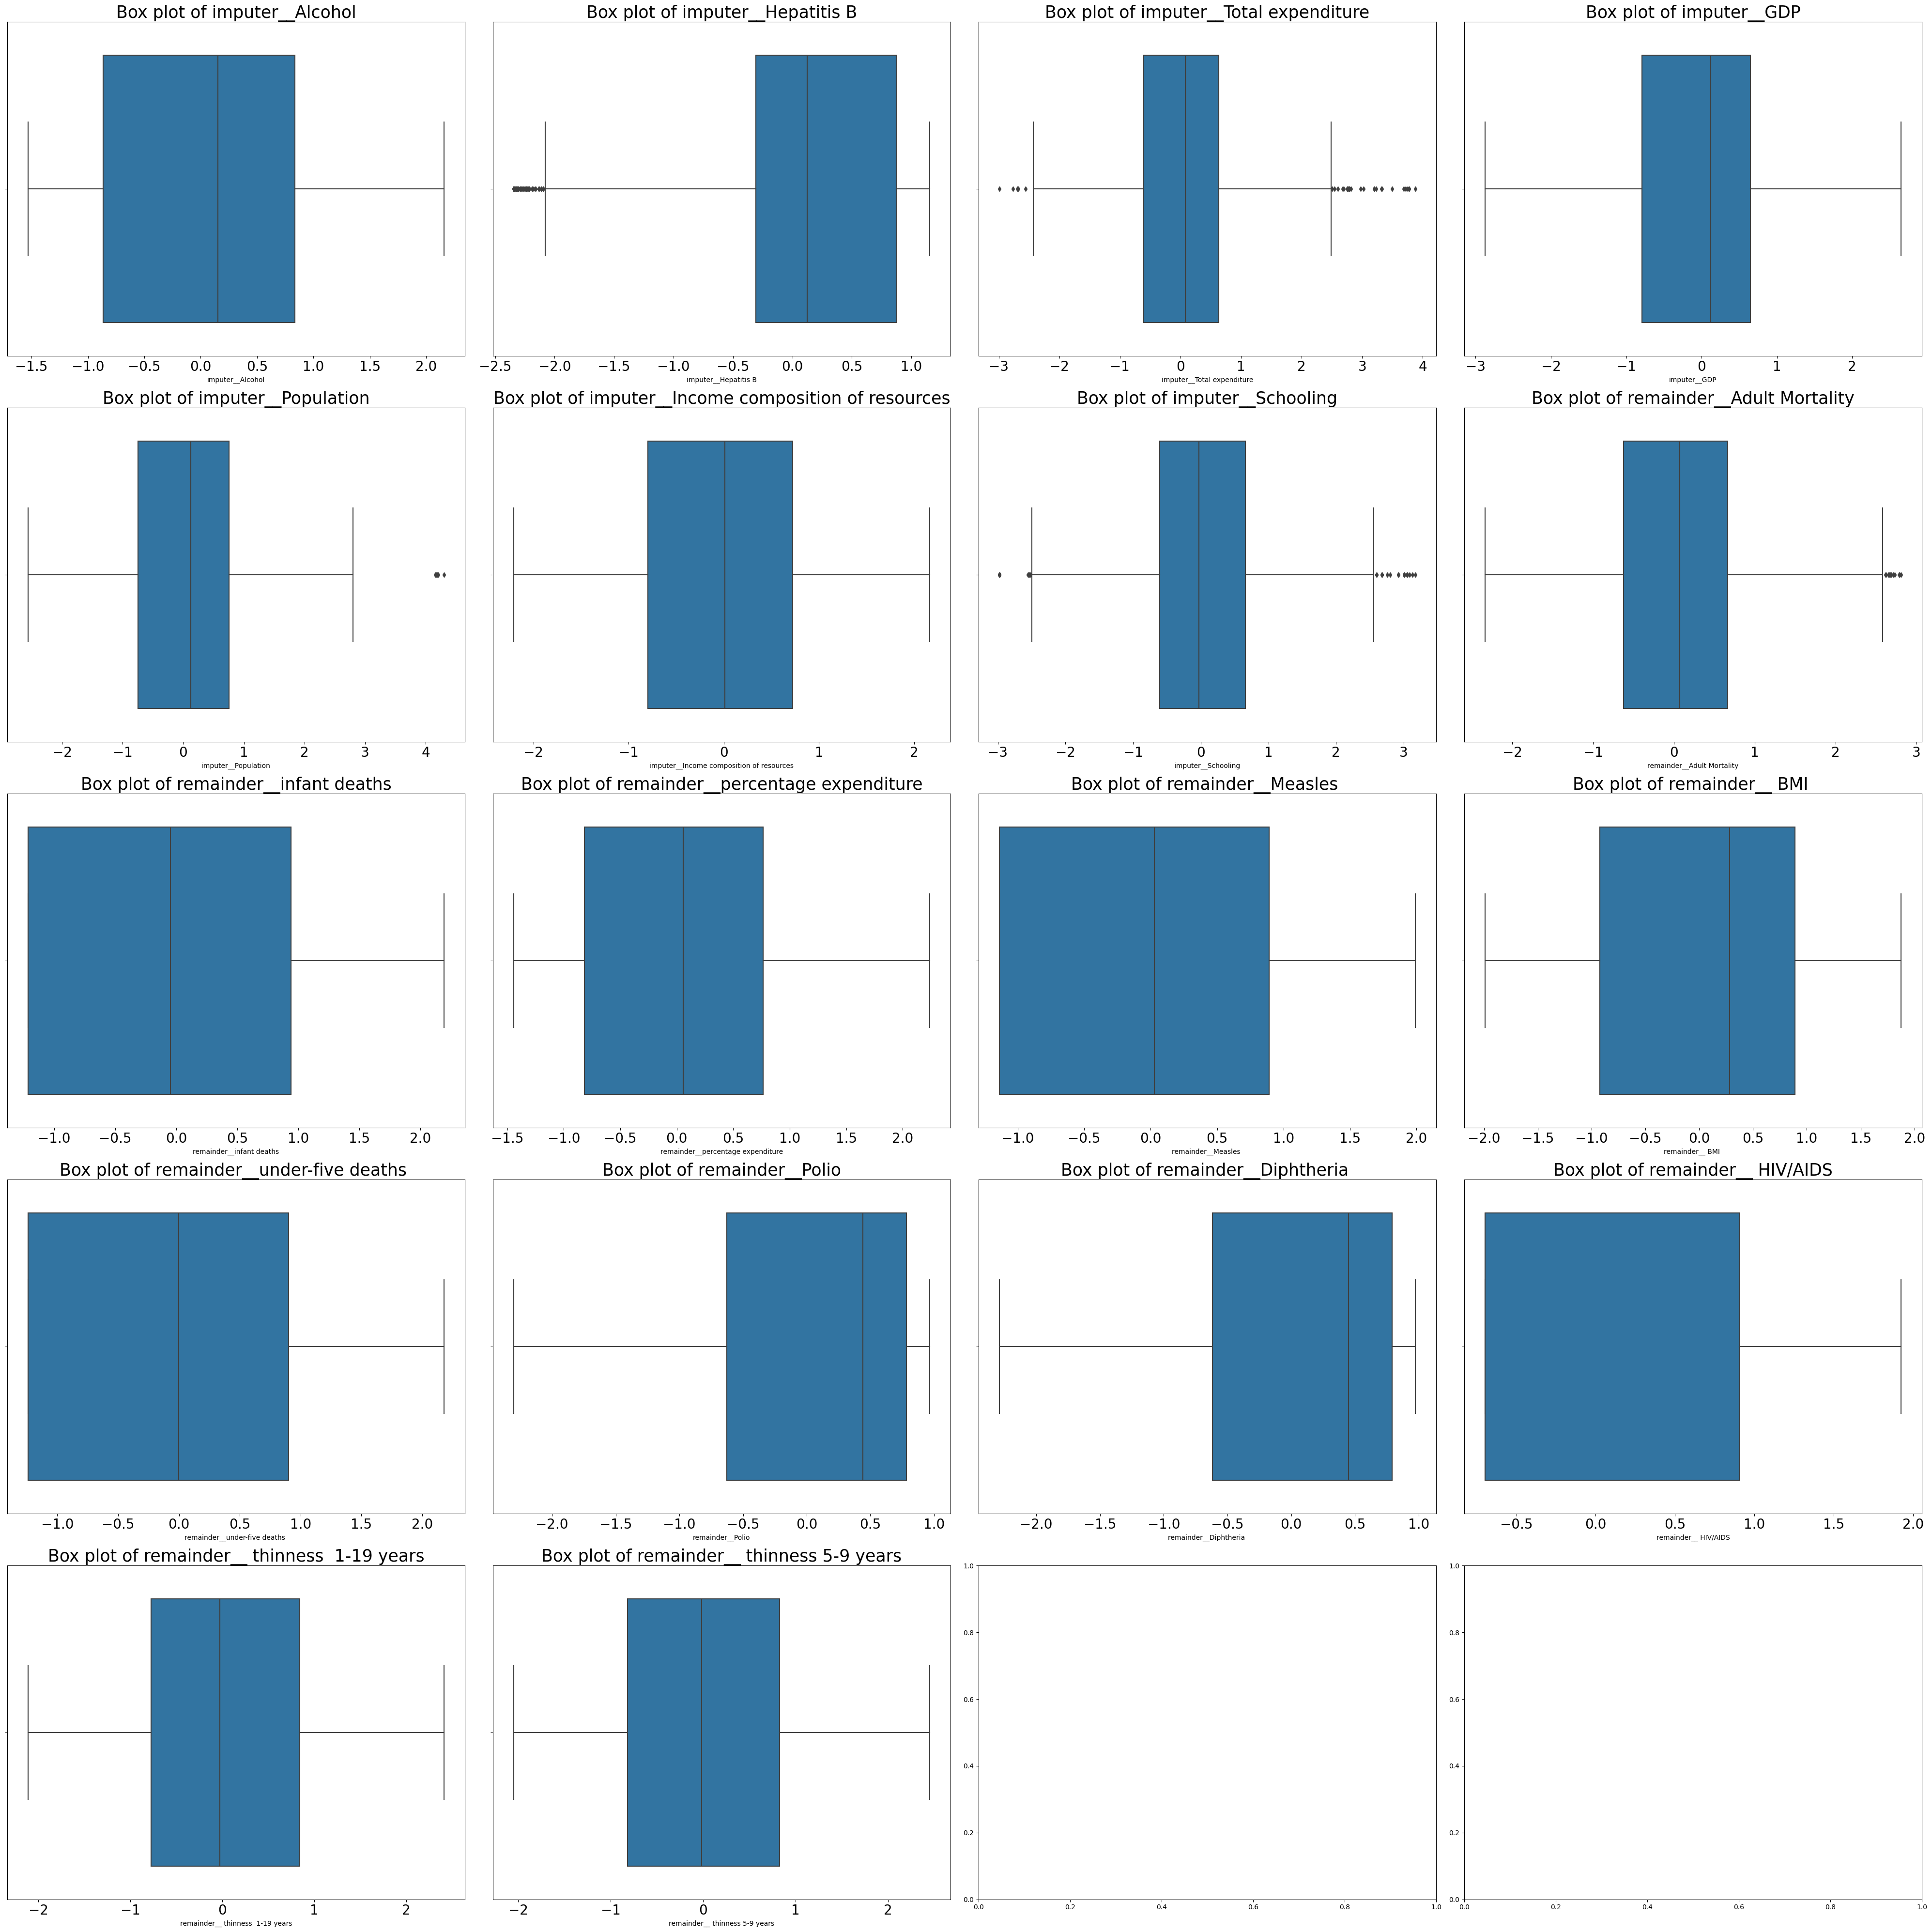

In [263]:
fig, ax = plt.subplots(nrows = 5, ncols=4, figsize = (40,40))
ax = ax.flatten()
plot_ax = 0
ignore_columns = ["remainder__Life expectancy ","remainder__Status_Developed","remainder__Status_Developing"]
for i in df2.columns:
    if i in ignore_columns:
        continue
    else:
        sns.boxplot(data = x, x = i, ax = ax[plot_ax])
        ax[plot_ax].tick_params(axis='x', labelsize=20)
        ax[plot_ax].set_title(f'Box plot of {i}', fontsize = 25)
        plot_ax = plot_ax + 1

plt.tight_layout()
plt.savefig('C:\\Users\\Abhinav Khandelwal\\Desktop\\MS DS\\Trimester 3\\Regression Modelling\\Project Life Expectancy\\box_plot_after_transform.png', dpi=300, bbox_inches='tight')

plt.show() 

In [42]:
fea = SelectKBest(score_func=f_regression)

In [43]:
fea.fit(x,y)

SelectKBest(score_func=<function f_regression at 0x000001F6C47C59E0>)

In [46]:
list(fea.get_feature_names_out())

['imputer__Income composition of resources',
 'imputer__Schooling',
 'remainder__Adult Mortality',
 'remainder__infant deaths',
 'remainder__ BMI ',
 'remainder__under-five deaths ',
 'remainder__Polio',
 'remainder__Diphtheria ',
 'remainder__ HIV/AIDS',
 'remainder__ thinness 5-9 years']

In [47]:
x = x[fea.get_feature_names_out()]

# Model Building

In [48]:
#Splitting the dataset into training and testting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [49]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     remainder__Life expectancy    R-squared:                       0.834
Model:                                     OLS   Adj. R-squared:                  0.834
Method:                          Least Squares   F-statistic:                     1159.
Date:                         Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                                 06:55:01   Log-Likelihood:                -6398.3
No. Observations:                         2310   AIC:                         1.282e+04
Df Residuals:                             2299   BIC:                         1.288e+04
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [59]:
#Columns whose p-value is less than 0.05
significant_col = x.columns[(model.pvalues < 0.05).values[1:]]

In [60]:
list(significant_col)

['imputer__Income composition of resources',
 'imputer__Schooling',
 'remainder__Adult Mortality',
 'remainder__infant deaths',
 'remainder__under-five deaths ',
 'remainder__Diphtheria ',
 'remainder__ HIV/AIDS',
 'remainder__ thinness 5-9 years']

In [61]:
insignificant_col = x.columns[(model.pvalues > 0.05).values[1:]]
list(insignificant_col)

['remainder__ BMI ', 'remainder__Polio']

In [53]:
x_test = sm.add_constant(x_test)
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.8289939182434203